In [1]:
from data.portfolio import Portfolio
from modelling.tools import Tools
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

np.set_printoptions(suppress=True)

In [2]:
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "JNJ", "PFE", "VZ", "T", "KO", "SPY", "META", "NVDA", "JD", "CORT", "PRA"]
start_date = "2013-12-31"
end_date = "2023-12-31"
dfport = yf.download(tickers, start_date, end_date)


[*********************100%***********************]  16 of 16 completed


In [3]:
date_filter_start = "2019-01-01"
date_filter_end = "2023-12-31"
tickers1 = ["JD", "AAPL", "META", "NVDA", "AMZN"]
weigths = [1/len(tickers1)]*len(tickers1)
portfolio = Portfolio(data_in = dfport, tickers = tickers1, weights = weigths, start = date_filter_start, end = date_filter_end, risk_free_rate = 0.01)

In [4]:
portfolio_return, portfolio_std, sharpe_ratio, vaR, cvaR = portfolio.portfolio_performance(alpha = 0.05)

In [21]:
tools = Tools(portfolio)
num_portfolios = 10000
results, weights_array = tools.simulate_random_portfolios(num_portfolios, alpha = 0.05)
ret_arr = results[0]
stdev_arr = results[1]
sharpe_arr = results[2]
vaR_arr = results[3]
cVar_arr = results[4]
print("Simulated Portfolio Returns:\n", results[0])
print("Simulated Portfolio Standard Deviations:\n", results[1])
print("Simulated Portfolio Sharpe Ratios:\n", results[2])
print("Simulated Portfolio vaR:\n",vaR_arr)
print("Simulated Portfolio cVar:\n", vaR_arr)


Simulated Portfolio Returns:
 [0.53789923 0.59405588 0.59533606 ... 0.61164848 0.6186231  0.6625726 ]
Simulated Portfolio Standard Deviations:
 [0.31376004 0.332049   0.35228575 ... 0.34056179 0.34979784 0.34152358]
Simulated Portfolio Sharpe Ratios:
 [1.68249353 1.75894483 1.66153771 ... 1.7666353  1.73992811 1.91076877]
Simulated Portfolio vaR:
 [0.03014304 0.03215601 0.03485115 ... 0.03323785 0.03398882 0.03161271]
Simulated Portfolio cVar:
 [0.03014304 0.03215601 0.03485115 ... 0.03323785 0.03398882 0.03161271]


In [22]:
max_stdev_shap = stdev_arr[sharpe_arr.argmax()] 
max_ret_shap = ret_arr[sharpe_arr.argmax()] 

min_stdev_vaR = stdev_arr[vaR_arr.argmin()] 
min_ret_vaR = ret_arr[vaR_arr.argmin()] 

min_stdev_cvaR = stdev_arr[cVar_arr.argmin()] 
min_ret_cvaR = ret_arr[cVar_arr.argmin()] 


### Efficient Frontiers

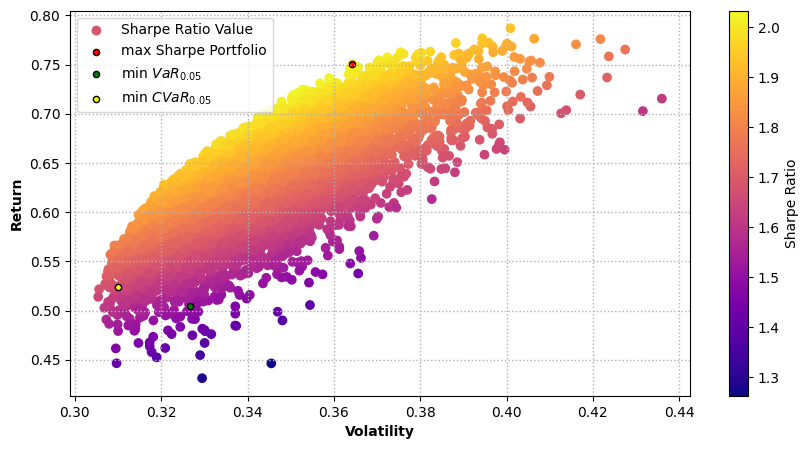

In [23]:
plt.figure(figsize = (10,5))
plt.scatter(stdev_arr, ret_arr, c=sharpe_arr, cmap = 'plasma')
plt.colorbar (label = 'Sharpe Ratio')
plt.xlabel('Volatility', fontweight = 'bold')
plt.ylabel('Return', fontweight = 'bold')
plt.scatter(max_stdev_shap, max_ret_shap, c = 'red', s=20, edgecolors='black')
plt.scatter(min_stdev_vaR , min_ret_vaR, c = 'green', s=20, edgecolors='black')
plt.scatter(min_stdev_cvaR, min_ret_cvaR, c = 'yellow', s=20, edgecolors='black')

plt.legend(["Sharpe Ratio Value","max Sharpe Portfolio", r'min $VaR_{0.05}$', r'min $CVaR_{0.05}$'],fontsize="10", loc ="upper left")
plt.grid(True, ls=':',lw=1)

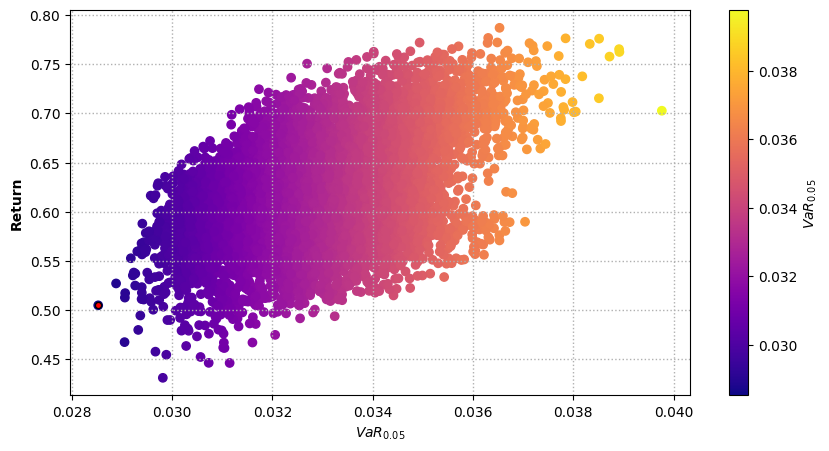

In [24]:
plt.figure(figsize = (10,5))
plt.scatter(vaR_arr, ret_arr, c=vaR_arr, cmap = 'plasma')
plt.colorbar (label = r'$VaR_{0.05}$')
plt.xlabel(r'$VaR_{0.05}$', fontweight = 'bold')
plt.ylabel('Return', fontweight = 'bold')
plt.grid(True, ls=':',lw=1)

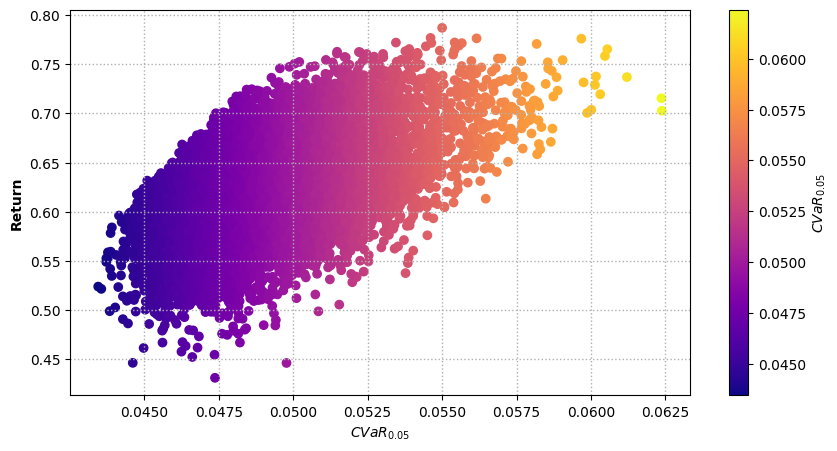

In [25]:
plt.figure(figsize = (10,5))
plt.scatter(cVar_arr, ret_arr, c=cVar_arr, cmap = 'plasma')
plt.colorbar (label = r'$CVaR_{0.05}$')
plt.xlabel(r'$CVaR_{0.05}$', fontweight = 'bold')
plt.ylabel('Return', fontweight = 'bold')
plt.grid(True, ls=':',lw=1)

### Optimized Porfolios

In [28]:
date_filter_start = "2019-01-01"
date_filter_end = "2023-12-31"
tickers1 = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "JNJ", "PFE", "VZ", "T", "KO", "SPY", "META", "NVDA", "JD", "CORT", "PRA"]
weigths = [1/len(tickers1)]*len(tickers1)
portfolio_opt = Portfolio(data_in = dfport, tickers = tickers1, weights = weigths, start = date_filter_start, end = date_filter_end, risk_free_rate = 0.01)

In [29]:
tools = Tools(portfolio_opt)
weights_shap, fun_shap = tools.optimize_metric(metric='sharpe', alpha=0.05)
weights_vaR, fun_vaR = tools.optimize_metric(metric='var', alpha=0.05)
weights_CvaR, fun_CvaR = tools.optimize_metric(metric='cvar', alpha=0.05)
# weights_vaR, fun_vaR = tools.optimize_metric(metric='sharpe_var', alpha=0.05)
# weights_CvaR, fun_CvaR = tools.optimize_metric(metric='sharpe_cvar', alpha=0.05)

In [30]:
print(weights_shap)
print(weights_vaR)
print(weights_CvaR)

[0.3098077  0.         0.         0.         0.20476677 0.
 0.         0.         0.         0.         0.         0.
 0.38219841 0.         0.10322711 0.        ]
[0.         0.06343703 0.00929936 0.01872464 0.0000785  0.18825466
 0.13092471 0.17646672 0.10320102 0.12818217 0.02599381 0.00888107
 0.00441698 0.007371   0.13298156 0.00178676]
[0.         0.         0.         0.01704966 0.         0.30504485
 0.04895676 0.40952393 0.         0.12900644 0.01304274 0.
 0.         0.         0.07718389 0.00019173]


In [31]:
alpha_shap, beta_shap = tools.calculate_alpha_beta(weights = weights_shap)
alpha_var, beta_var = tools.calculate_alpha_beta(weights = weights_vaR)
alpha_cvar, beta_cvar = tools.calculate_alpha_beta(weights = weights_CvaR)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [32]:
portfolio_opt.calculate_mean_returns(weights_shap)
portfolio_opt.calculate_mean_returns(weights_vaR)
portfolio_opt.calculate_mean_returns(weights_CvaR)

0.06570330914231112

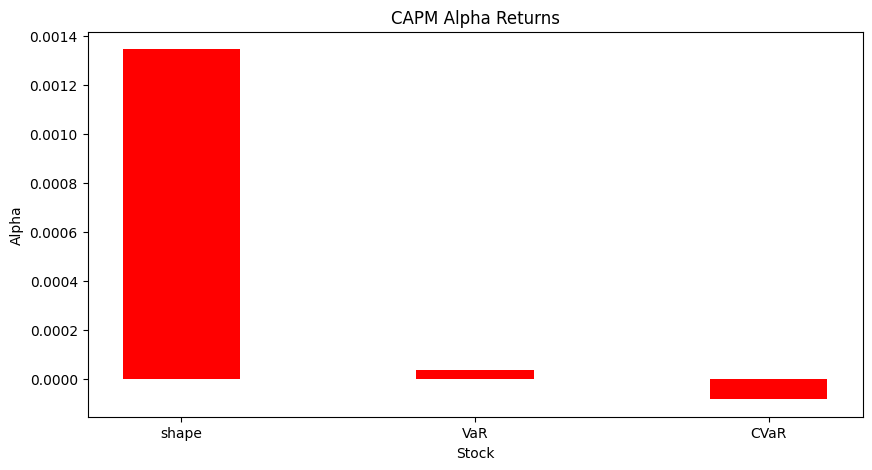

In [33]:
data = {'shape':alpha_shap, 'VaR':alpha_var, 'CVaR':alpha_cvar}
xvalues = list(data.keys())
yvalues = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(xvalues, yvalues, color ='red', 
        width = 0.4)
 
plt.xlabel("Stock")
plt.ylabel("Alpha")
plt.title("CAPM Alpha Returns")
plt.show()

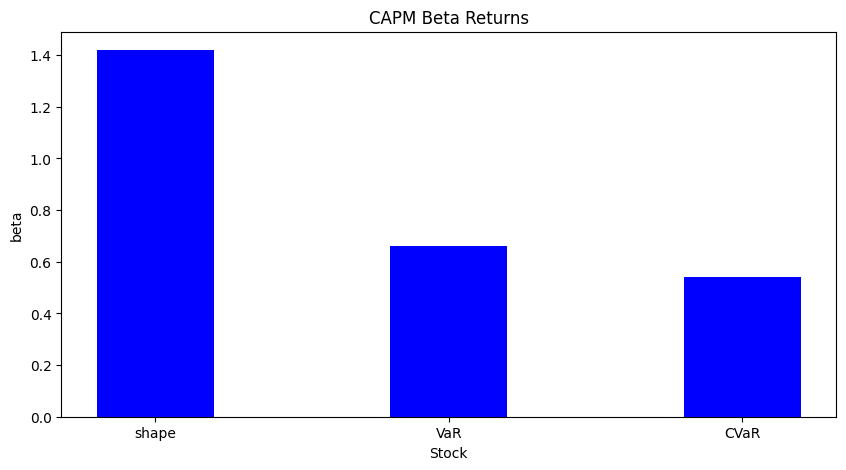

In [34]:
data = {'shape':beta_shap, 'VaR':beta_var, 'CVaR':beta_cvar}
xvalues = list(data.keys())
yvalues = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(xvalues, yvalues, color ='blue', 
        width = 0.4)
 
plt.xlabel("Stock")
plt.ylabel("beta")
plt.title("CAPM Beta Returns")
plt.show()